In [1]:
install.packages('ggridges')

Installing package into ‘/usr/local/lib/R/3.4/site-library’
(as ‘lib’ is unspecified)


In [2]:
library(ggplot2)
library(ggridges)

In [3]:
library(readr)
library(tidyr)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
full_db <- read_csv( 'both_sides_features_and_results.csv') #%>% select( SimpleSev, svr_pred )

Parsed with column specification:
cols(
  .default = col_double(),
  converted_file_name = col_character(),
  Patid = col_integer(),
  Areds_subject_id = col_character(),
  Baseline_AMD_Category = col_character(),
  Final_AMD_Phenotype_Group = col_character(),
  Final_AMD_Phenotype = col_character(),
  Final_Cataract_Phenotype = col_character(),
  Treatment = col_character(),
  male = col_integer(),
  white = col_integer(),
  Visit = col_integer(),
  EyeLR = col_character(),
  sex = col_character(),
  svc_pred = col_integer()
)
See spec(...) for full column specifications.


In [5]:
head(full_db)

Edge Features () [0],Edge Features () [1],Edge Features () [2],Edge Features () [3],Edge Features () [4],Edge Features () [5],Edge Features () [6],Edge Features () [7],Edge Features () [8],Edge Features () [9],⋯,white,Visit,EyeLR,SevScore,SimpleSev,age,svr_pred,svr_residual,sex,svc_pred
63372.50,0.01335088,0.01573270,0.01300831,0.01568404,24573.75,26889.88,25900.88,23928.12,24841.12,⋯,1,0,LE,1,0,69.46849,2.823248,1.8232482,male,3
59996.25,0.03429582,0.02643696,0.01044638,0.02471702,23329.75,27308.50,26250.25,23240.50,24951.00,⋯,1,6,LE,1,0,69.11781,1.624482,0.6244817,female,1
62047.75,0.01898665,0.01793113,0.01837230,0.02279965,23575.50,27673.50,26865.12,23426.75,24366.38,⋯,1,0,LE,1,0,73.49589,2.265979,1.2659793,female,1
64808.50,0.01326757,0.01124515,0.01282543,0.01605572,24667.38,26299.75,25752.75,24440.50,25232.12,⋯,1,0,LE,1,0,69.61370,1.804036,0.8040362,male,1
65455.88,0.01824532,0.01302647,0.01414844,0.01795443,24758.62,26050.75,25554.88,24511.12,24984.88,⋯,1,0,LE,1,0,64.55890,1.285739,0.2857387,female,1
62764.12,0.01974037,0.01517462,0.02129461,0.02543866,24442.25,26545.62,26034.88,24706.75,25197.00,⋯,1,0,LE,1,0,68.18904,2.778501,1.7785009,male,1


In [6]:
pred_data <- full_db %>% select(SevScore, svr_pred ) %>% drop_na()

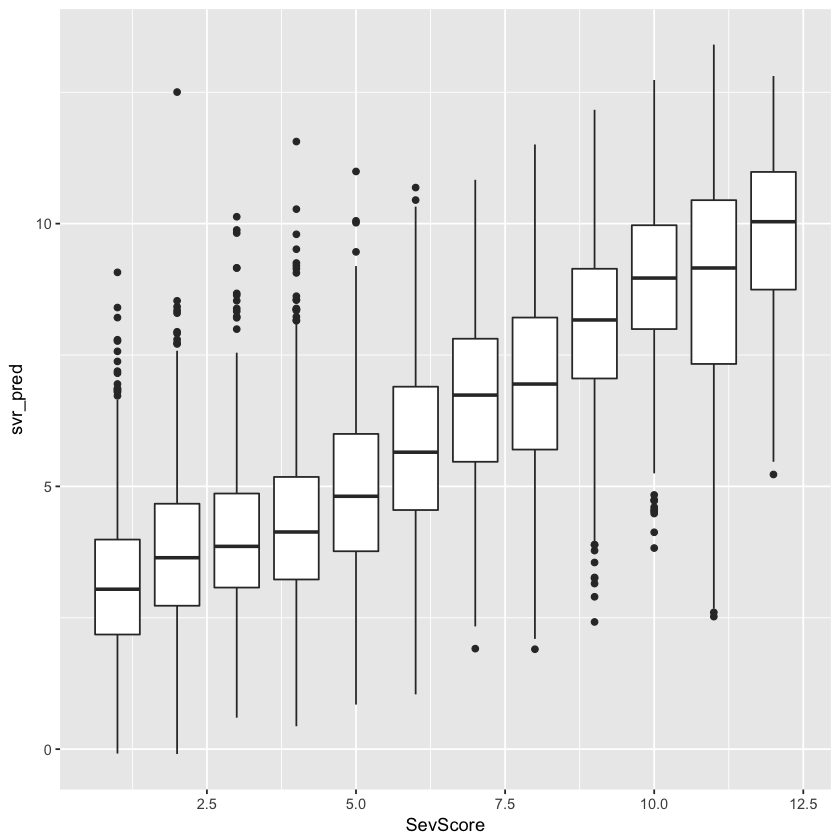

In [7]:
 ggplot(pred_data)  + geom_boxplot( aes(y = svr_pred, x=SevScore, group=SevScore ) )#geom_density_ridges()

Picking joint bandwidth of 0.404


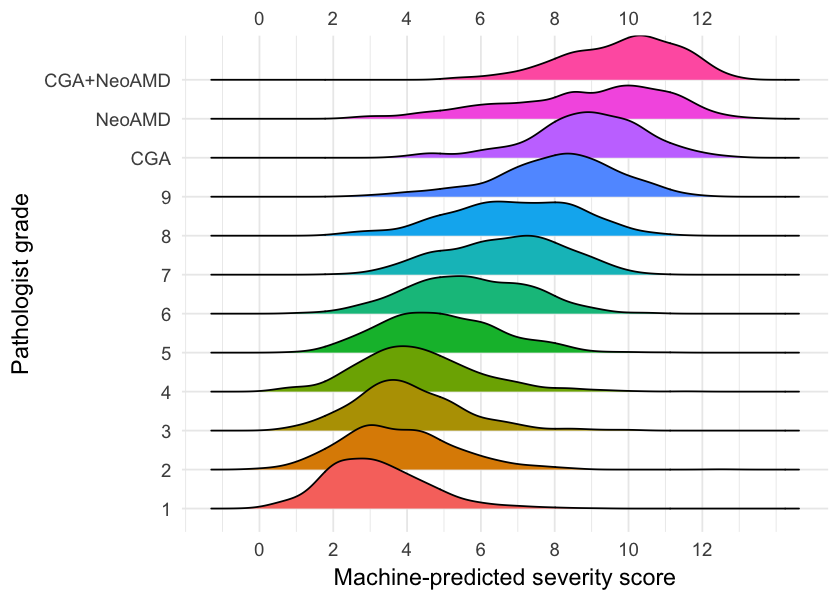

In [8]:
options( repr.plot.width=7, repr.plot.height=5)
ggplot(pred_data, aes(x = svr_pred, y=factor(SevScore), group=factor(SevScore), fill=factor(SevScore) ))  +
        geom_density_ridges( scale=1.3)  +  theme_minimal(base_size = 14) + guides( fill="none") +
        scale_y_discrete( breaks=c('1', '2', '3', "4", "5", "6", "7", "8", "9", "10", "11", "12"),
                        labels=c('1', '2', '3', "4", "5", "6", "7", "8", "9", "CGA", "NeoAMD", "CGA+NeoAMD")) +
        scale_x_continuous(breaks = c(0, 2, 4, 6, 8, 10, 12), 
                           sec.axis = sec_axis(~., breaks=c(0, 2, 4, 6, 8, 10, 12)) ) +
        labs( x="Machine-predicted severity score", y="Pathologist grade")

In [9]:
ggsave( "paper/images/both_sides_svr_ridgeplot.pdf", width=7, height=5)

Picking joint bandwidth of 0.404
